In [1]:
import numpy as np
from scipy.io import loadmat
import mne

In [2]:
path = 'C:\\Users\\grazi\\Desktop\\Materiale FVAB\\SEED_IV Database\\SEED_IV Database\\eeg_raw_data\\1\\2_20150915.mat'

In [3]:
# Load the EEG data from the .mat file
mat_data = loadmat(path)

In [4]:
# Extract the EEG data and electrode locations from the .mat file
eeg_data = mat_data['ha_eeg1']

In [5]:
eeg_data.shape

(62, 33601)

In [6]:
ch_names = ['FP1','FPZ','FP2','AF3','AF4','F7','F5','F3','F1','FZ','F2','F4','F6','F8','FT7','FC5','FC3','FC1','FCZ','FC2','FC4','FC6','FT8','T7','C5','C3','C1','CZ','C2','C4','C6','T8','TP7','CP5','CP3','CP1','CPZ','CP2','CP4','CP6','TP8','P7','P5','P3','P1','PZ','P2','P4','P6','P8','PO7','PO5','PO3','POZ','PO4','PO6','PO8','CB1','O1','OZ','O2','CB',]

In [7]:
# Create an MNE info object to store metadata about the EEG data
sfreq = 1000
info = mne.create_info(ch_names, sfreq, ch_types='misc')

In [8]:
# Create an MNE RawArray object to store the EEG data
raw = mne.io.RawArray(eeg_data, info)

Creating RawArray with float64 data, n_channels=62, n_times=33601
    Range : 0 ... 33600 =      0.000 ...   168.000 secs
Ready.


In [9]:
useful = ['FT7', 'FT8','T7', 'T8', 'TP7', 'TP8']

In [10]:
deletable = list(set(ch_names) - set(useful))

In [11]:
raw.drop_channels(deletable)

<RawArray | 6 x 33601 (168.0 s), ~1.5 MB, data loaded>

In [12]:
# Set the electrode locations for the EEG data
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

C:\Users\grazi\AppData\Local\Temp\ipykernel_8656\2630946516.py:3: RuntimeWarning: Not setting positions of 6 misc channels found in montage:
['FT7', 'FT8', 'T7', 'T8', 'TP7', 'TP8']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw.set_montage(montage)


<RawArray | 6 x 33601 (168.0 s), ~1.5 MB, data loaded>

In [13]:
# Select the indices of the miscellaneous channels
misc_ch_idx = mne.pick_types(raw.info, misc=True)

In [14]:
# Filter the data on the miscellaneous channels
raw._data[misc_ch_idx, :] = mne.filter.filter_data(
    raw._data[misc_ch_idx, :], raw.info['sfreq'], l_freq=0.3, h_freq=50.0, verbose=False)

Using matplotlib as 2D backend.


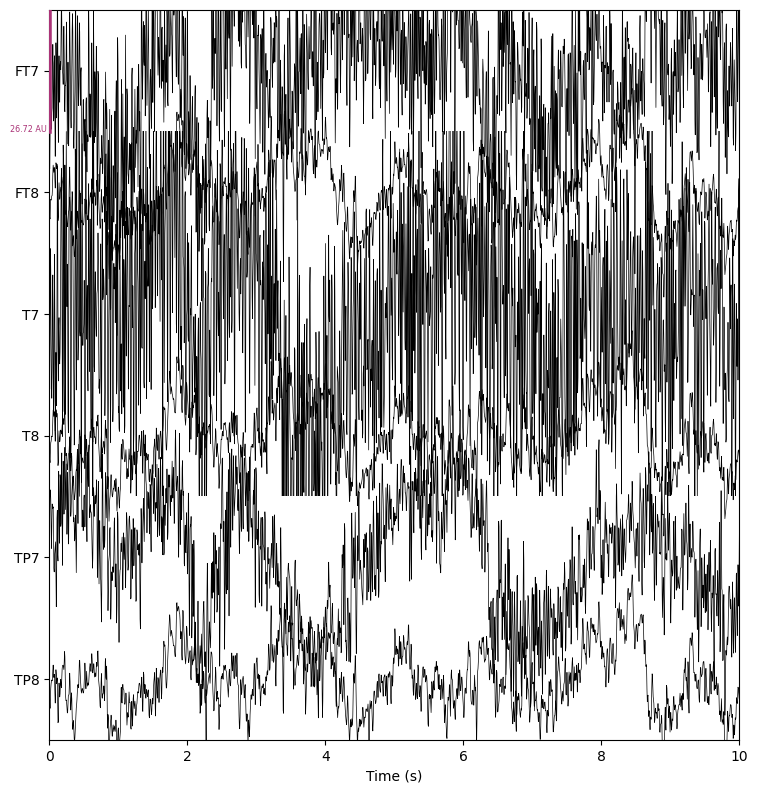

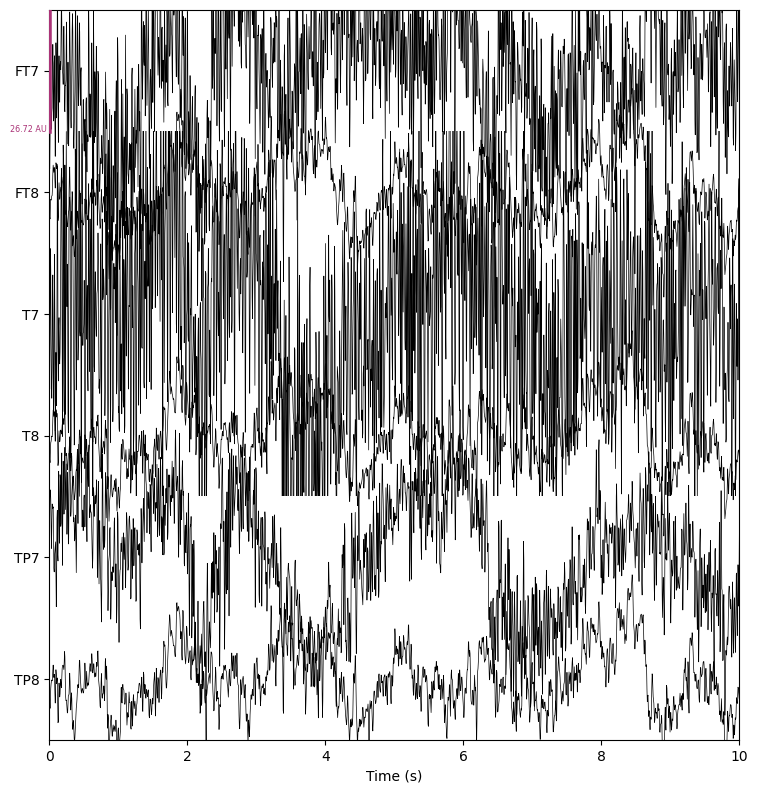

In [15]:
raw.plot(show_scrollbars=False)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)


C:\Users\grazi\AppData\Local\Temp\ipykernel_8656\4160492968.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, picks='misc')
C:\Users\grazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


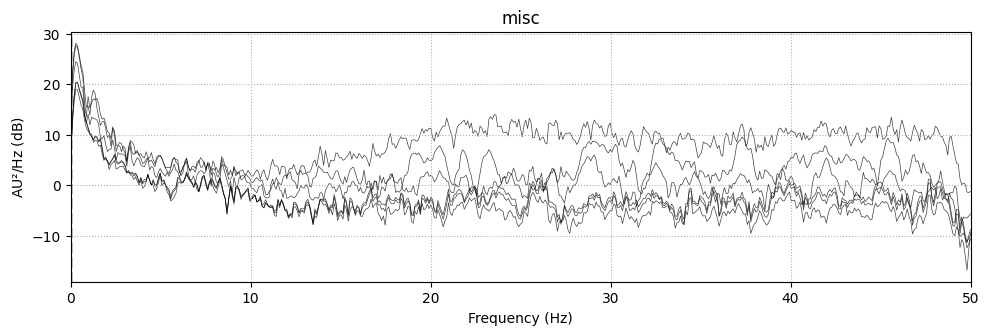

In [16]:
raw.plot_psd(fmax=50, picks='misc')